# ***Logistic Regression Prediction on Titanic Dataset***

In [ ]:
# Importing important Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, f1_score

# ***Get Dataset***

In [ ]:
# Getting Dataset (But first you have to upload heart.csv into google colab files)
heart_data = pd.read_csv("heart.csv")

# ***View head data in dataset***

In [ ]:
# Print the first 5 rows of each variables
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]


In [ ]:
# Checking data types of all variables
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Description of each column:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the 
hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)


# Checking Null Value

In [ ]:
# Showing each variables in the dataset if there's any null/NaN values
heart_data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check how many null value
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

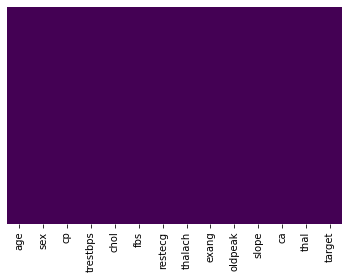

In [ ]:
# Visualize any null value
sb.heatmap(heart_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# Dari dataset yang kita dapatkan tidak ditemukan null value jadi tidak perlu melakukan data fixing

# Find Out How Many Target Have Disease

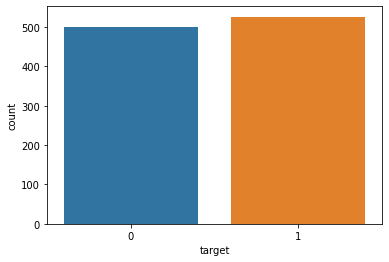

In [ ]:
# Checking the distribution result of independent variables
sb.countplot(x='target', data = heart_data)

# Male vs Female Chance of Getting Heart Disease

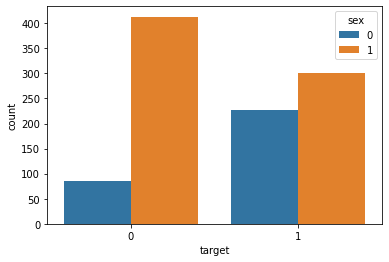

In [ ]:
# Checking the rate of getting heart disease by gender data
sb.countplot(x='target', data = heart_data, hue = 'sex')

# What Attributes That Have Only 2 Unique Values

In [ ]:
# Checking number of unique value in every column
heartDf = pd.DataFrame(heart_data)
ageunique = len(pd.unique(heartDf['age']))
sexunique = len(pd.unique(heartDf['sex']))
cpunique = len(pd.unique(heartDf['cp']))
trestbpsunique = len(pd.unique(heartDf['trestbps']))
cholunique = len(pd.unique(heartDf['chol']))
fbsunique = len(pd.unique(heartDf['fbs']))
restecgunique = len(pd.unique(heartDf['restecg']))
thalachunique = len(pd.unique(heartDf['thalach']))
exangunique = len(pd.unique(heartDf['exang']))
oldpeakunique = len(pd.unique(heartDf['oldpeak']))
slopeunique = len(pd.unique(heartDf['slope']))
caunique = len(pd.unique(heartDf['ca']))
thalunique = len(pd.unique(heartDf['thal']))
targetunique = len(pd.unique(heartDf['target']))
print("Number of Unique: ")
print("Age: ",ageunique)
print("Sex: ",sexunique)
print("Cp: ",cpunique)
print("trestbps: ",trestbpsunique)
print("chol: ",cholunique)
print("fbs: ",fbsunique)
print("restecg: ",restecgunique)
print("thalach: ",thalachunique)
print("exang: ",exangunique)
print("oldpeak: ",oldpeakunique)
print("slope: ",slopeunique)
print("ca: ",caunique)
print("thal: ",thalunique)
print("target: ",targetunique)

Number of Unique: 
Age:  41
Sex:  2
Cp:  4
trestbps:  49
chol:  152
fbs:  2
restecg:  3
thalach:  91
exang:  2
oldpeak:  40
slope:  3
ca:  5
thal:  4
target:  2


# Drop Column That Are Not Required in Prediction

In [ ]:
# Removing column that dont have big influence into prediction
heart_data.drop(['sex','fbs','exang'],axis=1,inplace=True)
heart_data.dtypes

age           int64
cp            int64
trestbps      int64
chol          int64
restecg       int64
thalach       int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Checking Correlation Between Each Variable

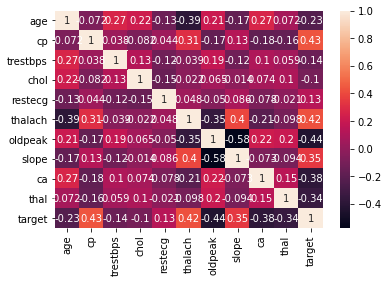

In [ ]:
# Check how strong relation between each variables and to determine Independent and Dependant Variables
Correlation = heart_data.corr()
sb.heatmap(Correlation, xticklabels=Correlation.columns,yticklabels=Correlation.columns, annot=True)

# Separating Dependent and Independent Variables

In [ ]:
x = heart_data[['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']]
y = heart_data[['target']]
print(x,y)

      age  cp  trestbps  chol  restecg  thalach  oldpeak  slope  ca  thal
0      52   0       125   212        1      168      1.0      2   2     3
1      53   0       140   203        0      155      3.1      0   0     3
2      70   0       145   174        1      125      2.6      0   0     3
3      61   0       148   203        1      161      0.0      2   1     3
4      62   0       138   294        1      106      1.9      1   3     2
...   ...  ..       ...   ...      ...      ...      ...    ...  ..   ...
1020   59   1       140   221        1      164      0.0      2   0     2
1021   60   0       125   258        0      141      2.8      1   1     3
1022   47   0       110   275        0      118      1.0      1   1     2
1023   50   0       110   254        0      159      0.0      2   0     2
1024   54   0       120   188        1      113      1.4      1   1     3

[1025 rows x 10 columns]       target
0          0
1          0
2          0
3          0
4          0
...     

# Logistic Regression Modelling

In [ ]:
# Splitting train and test data from the beginning dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [ ]:
# Making Logistic Regression Model
LogisticR = LogisticRegression(C = 0.01, solver = 'liblinear', random_state=0)
LogisticR.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicting Logistic Regression Using X_test
Predict = LogisticR.predict(X_test)

# Testing Logistic Regression

In [ ]:
# Measuring performance from Logistic Regression
accuracy = accuracy_score(Y_test, Predict)
MAE = mean_absolute_error(Y_test, Predict)
MSE = mean_squared_error(Y_test, Predict)
F1 = f1_score(Y_test, Predict, average='weighted')

print(" Accuration : %.2f" % accuracy)
print(" Mean Absolute Error : %.2f" % MAE)
print(" Mean Squared Error : %.2f" % MSE)
print(" F1 : %.2f" % F1)

 Accuration : 0.77
 Mean Absolute Error : 0.23
 Mean Squared Error : 0.23
 F1 : 0.77


In [ ]:
# Print Prediction Result and Expected Result
print(Predict)
print(np.array(Y_test))

[1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 1 0 1 1 1 0 1 1 0 0 0 1]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]

# Evaluate The Model and Experimental Result Analysis

In [ ]:
# Visualize incorrect and correct prediction based on factual result
cnf_matrix = confusion_matrix(Y_test, Predict, labels=[0,1])
pd.DataFrame(cnf_matrix,columns=['Predicted Don\'t Have Disease','Predicted Have Disease'],index=['Actual Don\'t Have Disease','Actual Have Disease'])

,Predicted Don't Have Disease,Predicted Have Disease
Actual Don't Have Disease,111,48
Actual Have Disease,23,126


In [ ]:
# Classification Report after Logistic Regression Prediction
print(classification_report(Y_test,Predict))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       159
           1       0.72      0.85      0.78       149

    accuracy                           0.77       308
   macro avg       0.78      0.77      0.77       308
weighted avg       0.78      0.77      0.77       308

